###  Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

### Business Goal 
This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Solution Approach

- Data Understanding & Analysis & Preparation- Treating Missing value and outlier 
- Data Transformation and Preprocessing 
- Test Train Split and Scaling
- Model Prediction and Evaluation ( MLR ,Ridge and Lasso Regression )
- Conclusions and Results


In [548]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn import metrics

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error

from scipy import stats
from scipy.stats import norm, skew 

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)

### Data Understanding

In [549]:
# Load data from csv
house_df = pd.read_csv("train.csv")
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [550]:
#Get shape of data
house_df.shape

(1460, 81)

In [551]:
#Get Column
house_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [552]:
#Describe
house_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


There are lot of difference between 75 percenticile and Max columns ,Which implies Outliers



In [553]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [554]:
# Check Duplicate Rows
house_df.duplicated().sum()

0

No duplicate rows in data 

#### Separating the Numerical and Categorical features for analysis



In [555]:
#Divide the Columns based on Numerical/continous and categorical
num_df = house_df.select_dtypes(include=['int64', 'float64'])
cat_df = house_df.select_dtypes(include=['object'])

In [556]:
# Numerical features in the dataframe
num_df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

#### Analyzing Numerical Data



In [557]:
### Checking percentage of outliers for all the numerical columns.
outliers_percentage={}

for feature in num_df.columns:
    IQR=num_df[feature].quantile(.75)-num_df[feature].quantile(.25)
    outliers_count=num_df[(num_df[feature]>(num_df[feature].quantile(.75)+1.5*IQR)) | (num_df[feature]<(num_df[feature].quantile(.25)-1.5*IQR))].shape[0]
    outliers_percentage[feature]=round(outliers_count/num_df.shape[0]*100,2)
    
outlier_df=pd.DataFrame({'Features':list(outliers_percentage.keys()),'Percentage':list(outliers_percentage.values())})
outlier_df.sort_values(by="Percentage", ascending=False)

,Features,Percentage
30,EnclosedPorch,14.25
10,BsmtFinSF2,11.44
5,OverallCond,8.56
32,ScreenPorch,7.95
1,MSSubClass,7.05
8,MasVnrArea,6.58
2,LotFrontage,6.03
18,BsmtHalfBath,5.62
29,OpenPorchSF,5.27
3,LotArea,4.73


Inference:

- Majority of the numeric columns have outliers
- Dropping all the outliers will cause loss of information.
- Hence reassigning fixed minimum and maximum values to those rows where feature value is outside the range of [25th percentile - 1.5 * IQR, 75th percentile + 1.5 * IQR]
- IQR or Inter Quartile Range = Difference between 75th percentile and 25th percentile values of a feature.
- Target column 'SalePrice' is excluded in this

In [558]:
for feature,percentage in outliers_percentage.items():
    if feature!='SalePrice':
        IQR = house_df[feature].quantile(.75) - house_df[feature].quantile(.25) 
        max_value = house_df[feature].quantile(.75)+1.5*IQR
        min_value = house_df[feature].quantile(.25)-1.5*IQR
        house_df[feature][house_df[feature] > max_value] = max_value
        house_df[feature][house_df[feature] < min_value ] = min_value

In [559]:
house_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.0,1460.0,1460.0,1460.0,1460.0,1460.000000,1460.000000,1460.000000
mean,730.500000,55.085616,69.134888,9647.388014,6.100685,5.543493,1971.299315,1984.865753,90.192149,439.997517,...,91.806849,42.603425,0.0,0.0,0.0,0.0,0.0,6.321918,2007.815753,180921.195890
std,421.610009,37.508183,19.662022,3594.356399,1.378430,0.963696,30.108397,20.645407,134.925253,433.219435,...,116.658120,52.501584,0.0,0.0,0.0,0.0,0.0,2.703626,1.328095,79442.502883
min,1.000000,20.000000,27.500000,1481.500000,2.000000,3.500000,1885.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.0,0.0,0.0,0.0,0.0,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.0,0.0,0.0,0.0,0.0,8.000000,2009.000000,214000.000000
max,1460.000000,145.000000,111.500000,17673.500000,10.000000,7.500000,2010.000000,2010.000000,415.000000,1780.625000,...,420.000000,170.000000,0.0,0.0,0.0,0.0,0.0,12.000000,2010.000000,755000.000000


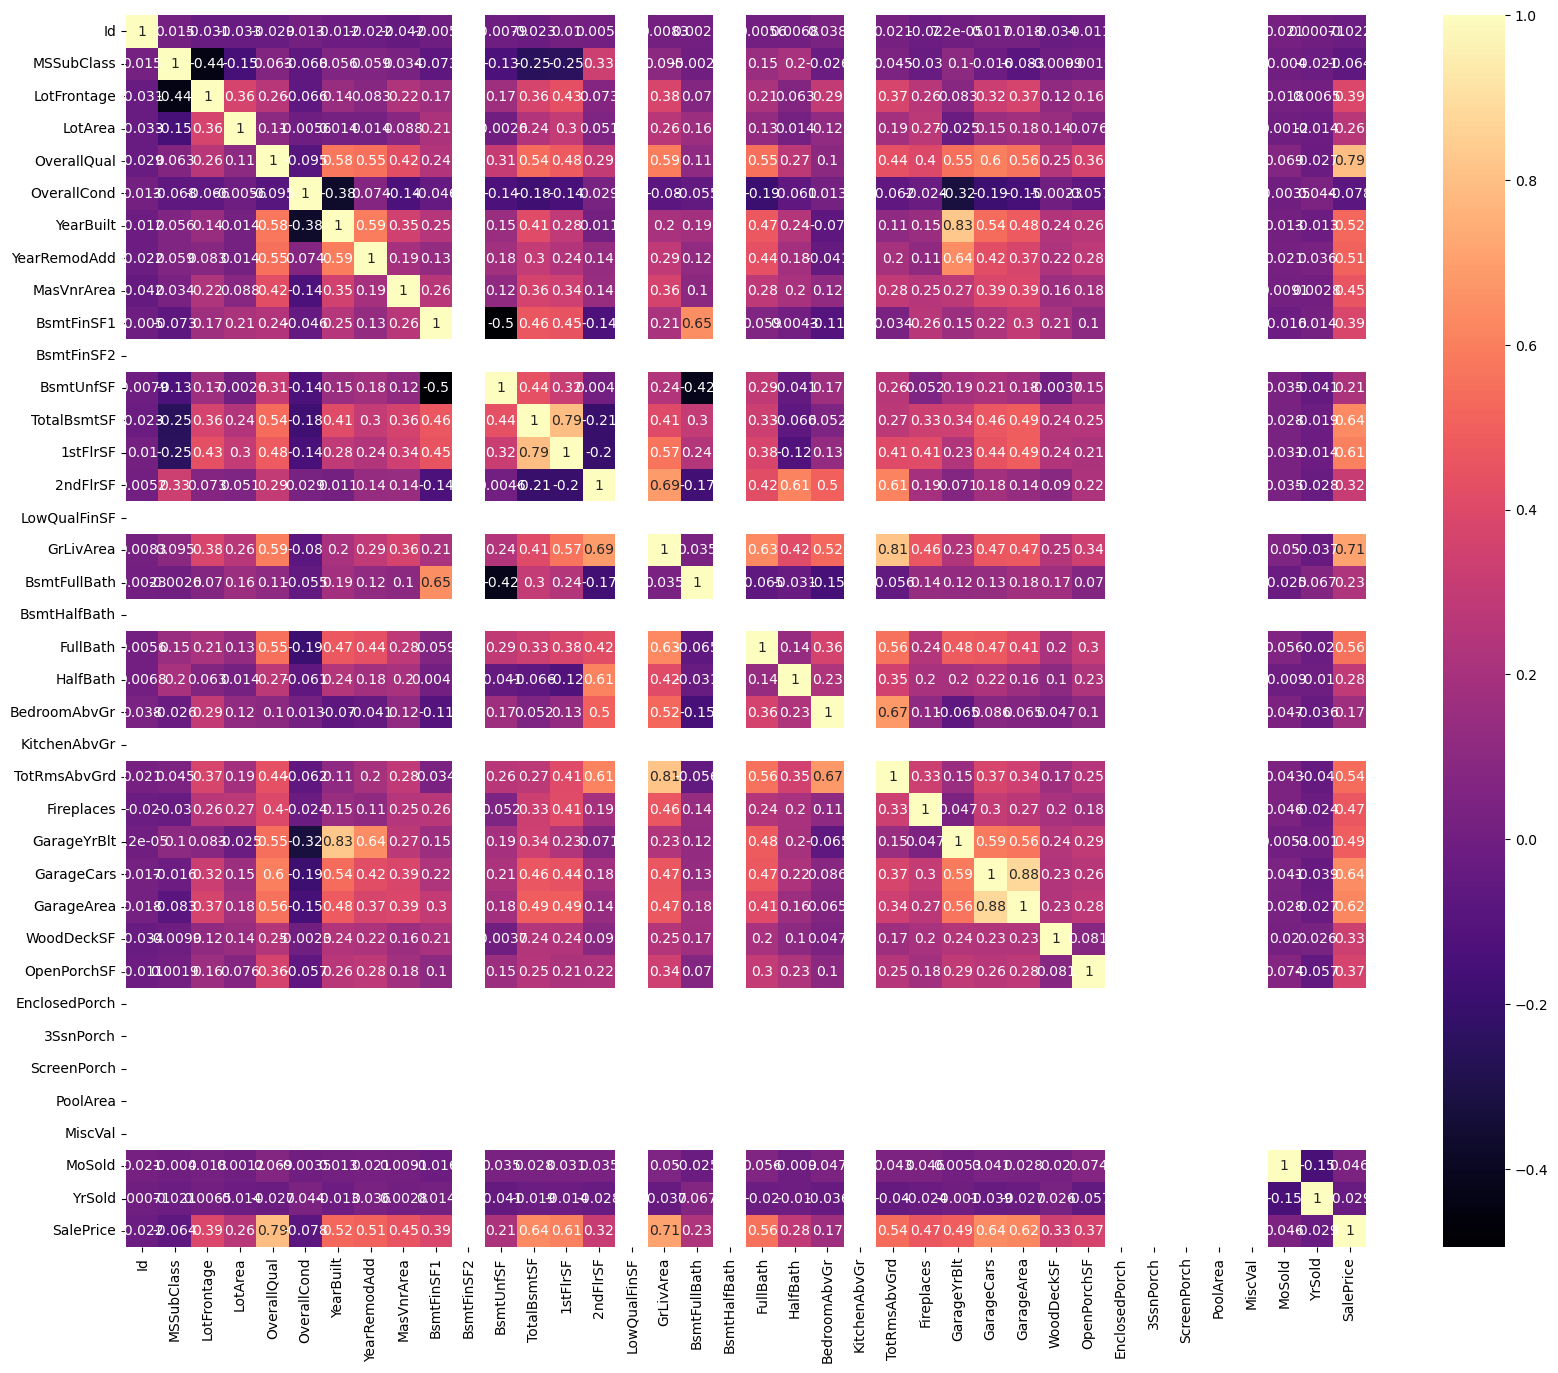

In [560]:
#### Check Correlation in Numeric Data
plt.figure(figsize=(20,16))
sns.heatmap(num_df.corr(), cmap='magma' ,annot=True)
plt.show()

**Inference:**
  - `GarageCars` and `GarageArea` are highly correlated (0.88)
  - `GarageYrBlt` and `YearBuilt` are highly correlated (0.83)
  - `TotRmsAbvGrd` and `GrLivArea` are highly correlated (0.83)
  - `TotalBsmtSF` and `1stflrSF` are highly correlated (0.82)

### Univariate and Bivariate Analysis - Numerical Features



#### Analyze Numerical Feature with continuous variable

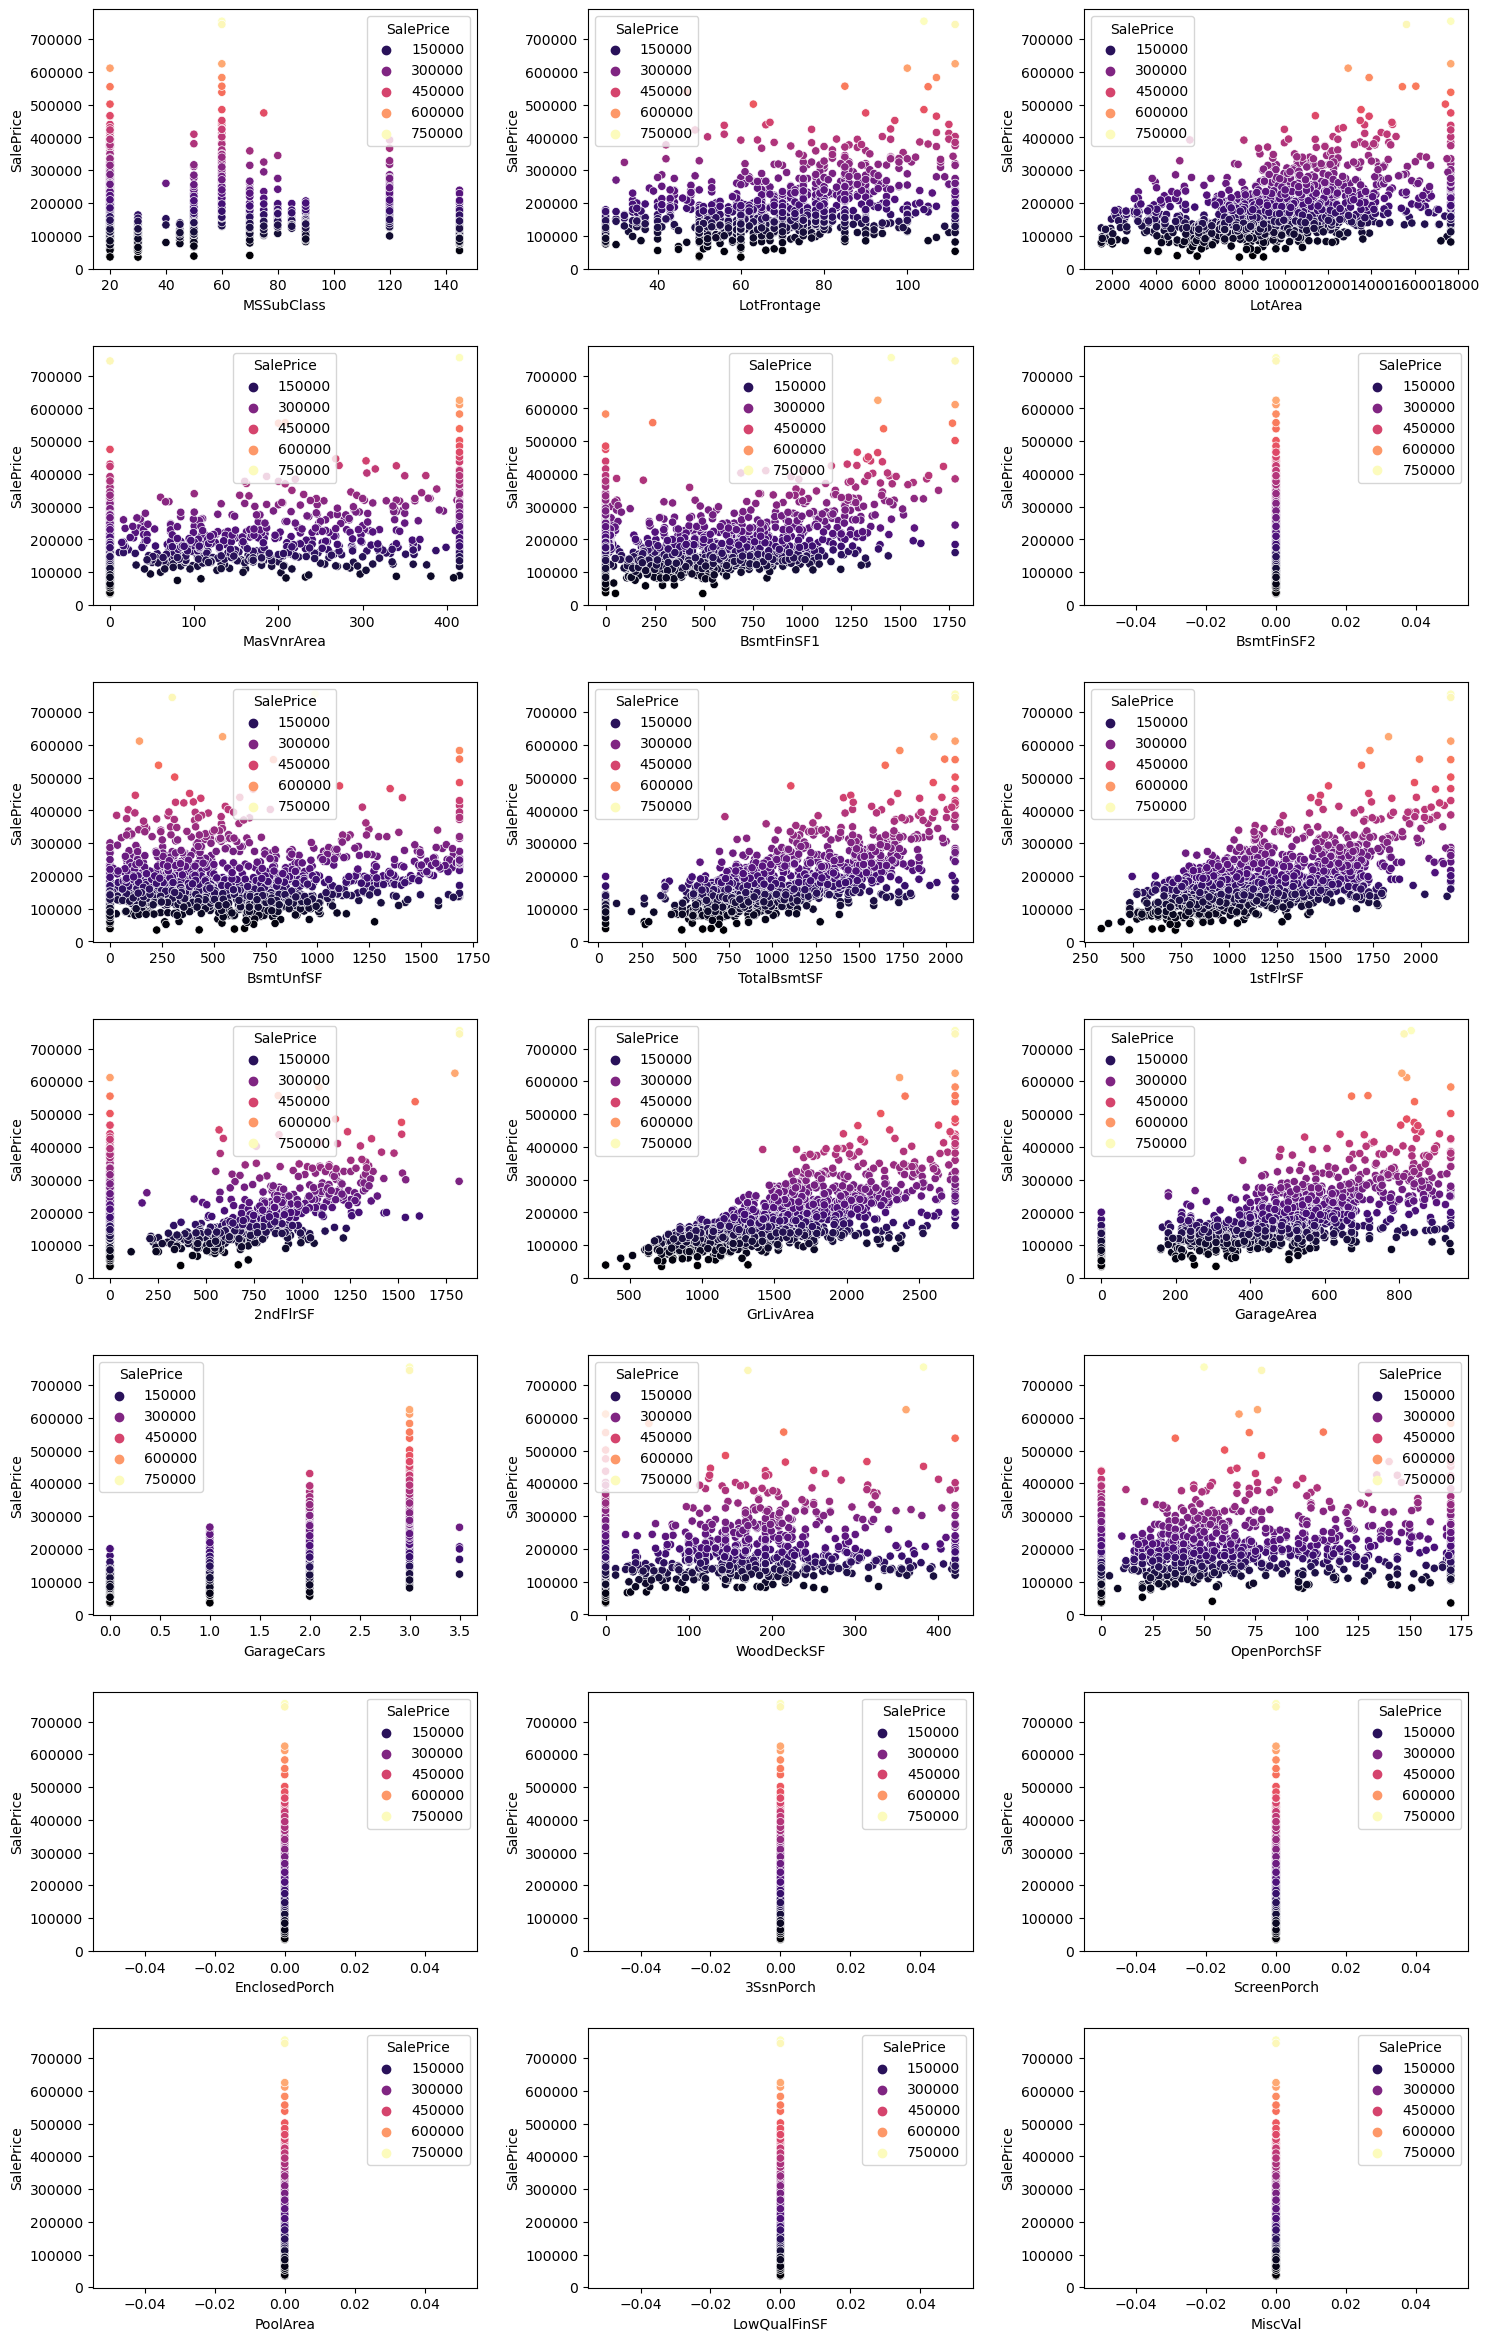

In [561]:
fig,axs=plt.subplots(figsize=(15, 30))
for i, feature in enumerate(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'LowQualFinSF','MiscVal']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(x=house_df[feature], y=house_df['SalePrice'], hue=house_df['SalePrice'],data=house_df,palette='magma')
    plt.tight_layout()

Inference:

LotFrontage, LotArea, BsmtFinSF1, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, GrLivArea, GarageArea are showing positive correlation with SalePrice
BsmtFinSF2, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, LowQualFinSF and MiscVal has single value and do not show any linear pattern, hence can be dropped
- others features show not pattern and are scattered.

#### Visualize the distribution of numeric features

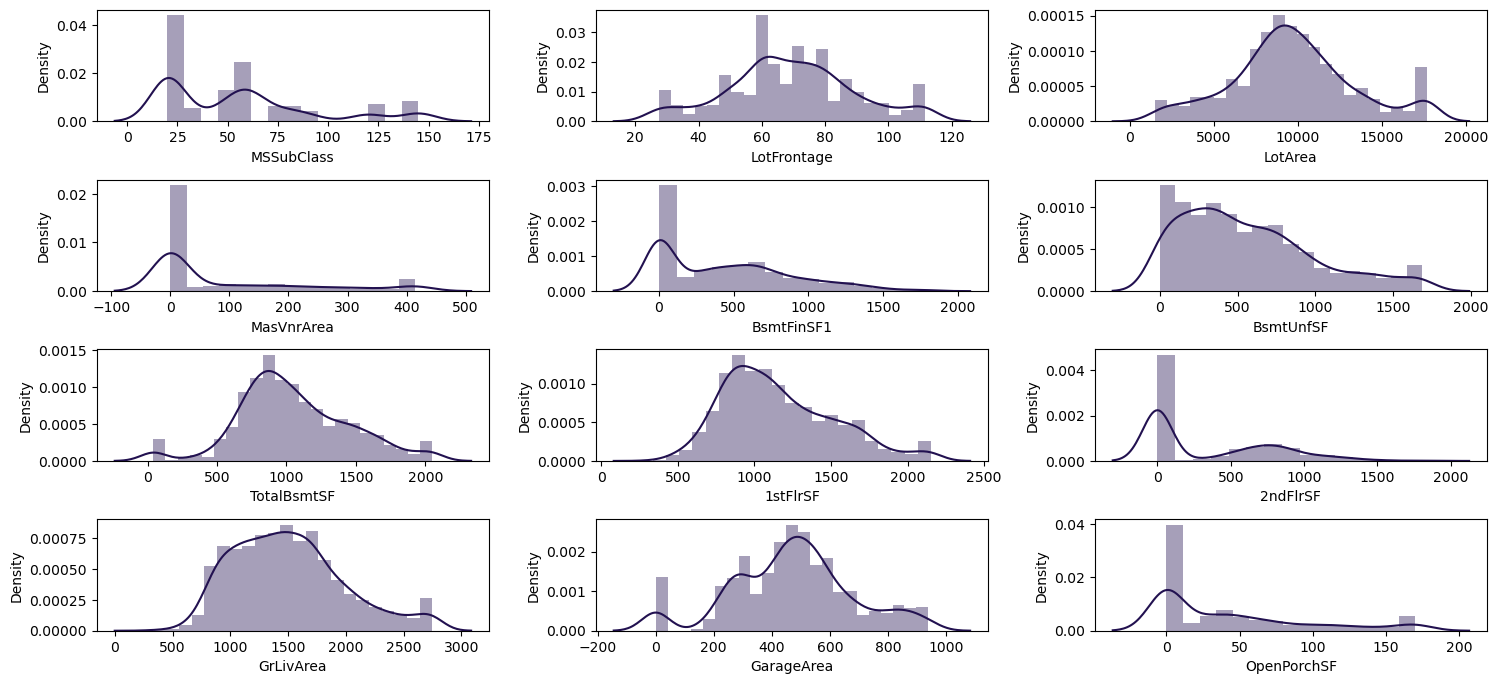

In [562]:
fig=plt.subplots(figsize=(15, 15))

for i, feature in enumerate(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1','BsmtUnfSF','TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'OpenPorchSF']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.set_palette('magma')
    sns.distplot(house_df[feature])
    plt.tight_layout()

Lot of columns contain fixed valuea nd these columns are not helpful in analyse because of value biasness

In [563]:
#### Analyze Numerical Features with Independent Discrete Values

In [564]:
house_df[['OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','YearBuilt','YearRemodAdd']]


,OverallQual,OverallCond,MoSold,YrSold,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,YearBuilt,YearRemodAdd
0,7,5.0,2,2008,1.0,0,2,1,3.0,1,8,0.0,2003.0,2003,2003
1,6,7.5,5,2007,0.0,0,2,0,3.0,1,6,1.0,1976.0,1976,1976
2,7,5.0,9,2008,1.0,0,2,1,3.0,1,6,1.0,2001.0,2001,2002
3,7,5.0,2,2006,1.0,0,1,0,3.0,1,7,1.0,1998.0,1915,1970
4,8,5.0,12,2008,1.0,0,2,1,4.0,1,9,1.0,2000.0,2000,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,5.0,8,2007,0.0,0,2,1,3.0,1,7,1.0,1999.0,1999,2000
1456,6,6.0,2,2010,1.0,0,2,0,3.0,1,7,2.0,1978.0,1978,1988
1457,7,7.5,5,2010,0.0,0,2,0,4.0,1,9,2.0,1941.0,1941,2006
1458,5,6.0,4,2010,1.0,0,1,0,2.0,1,5,0.0,1950.0,1950,1996


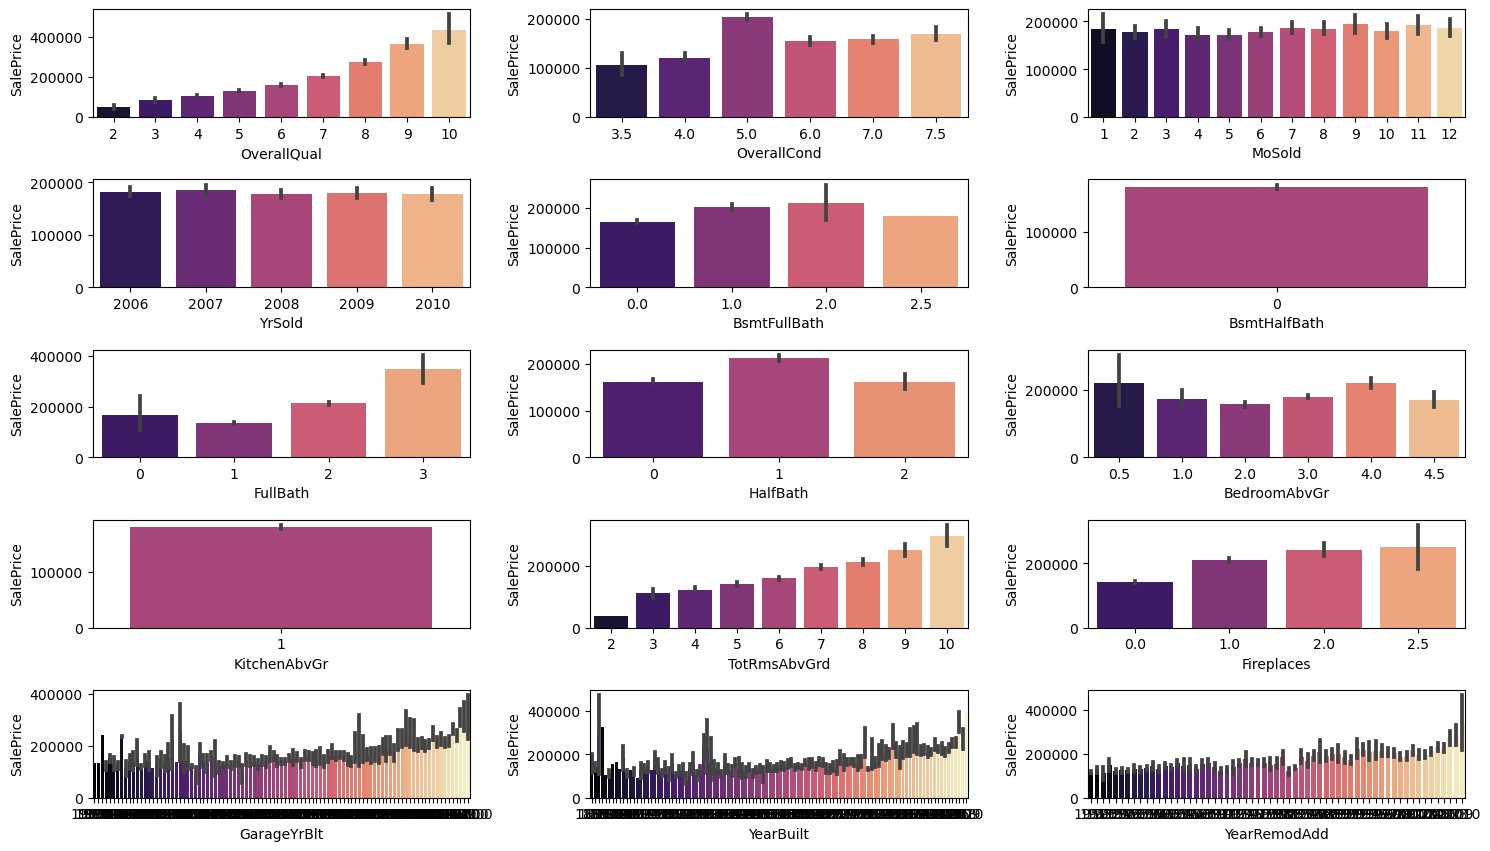

In [565]:
fig=plt.subplots(figsize=(15, 15))

for i, feature in enumerate(['OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','YearBuilt','YearRemodAdd']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.barplot(x=house_df[feature], y=house_df['SalePrice'], palette='magma')
    plt.tight_layout()

**Inference:**

 - `OverallQual` : As the rating of this feature increases, the SalePrice (target variable) increases

 - `MoSold` and `YrSold`: SalePrice does not show a strong trend depending on month and year on which realty is sold
 
 - `TotRmsAbvGrd` : As the number of total rooms above grade increase the SalePrice also increases 
 
 - `OverallCond` : SalePrice is highest for rating 5
 
 - `BsmtFullBath` = 2 and `BsmtHalfBath` = 0 have highest SalePrice

 - `FullBath` = 2 and `HalfBath` = 1 have highest SalePrice

 - `GarageYrBlt`,`YearBuilt`,`YearRemodAdd`, `YrSold` : Will extract new features from to identify any trend

 - `BsmtFullBath`, `KitchenAbvGr` : Need further analyse for meaningful insight and can derive more column

#### Check and Handle Missing Values

In [566]:
#Column not required so dropping the column
house_df = house_df.drop(columns = ['Id'])

In [567]:
house_df.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [568]:
house_df.isnull().sum().sort_values(ascending=False).head(25)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
MSSubClass         0
Fireplaces         0
Functional         0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr       0
dtype: int64

In [569]:
print(pd.DataFrame(round(house_df.isnull().sum()/len(house_df.index)*100,2).sort_values(ascending=False),columns=["Null %"]).head(25))


              Null %
PoolQC         99.52
MiscFeature    96.30
Alley          93.77
Fence          80.75
FireplaceQu    47.26
LotFrontage    17.74
GarageYrBlt     5.55
GarageCond      5.55
GarageType      5.55
GarageFinish    5.55
GarageQual      5.55
BsmtExposure    2.60
BsmtFinType2    2.60
BsmtCond        2.53
BsmtQual        2.53
BsmtFinType1    2.53
MasVnrArea      0.55
MasVnrType      0.55
Electrical      0.07
MSSubClass      0.00
Fireplaces      0.00
Functional      0.00
KitchenQual     0.00
KitchenAbvGr    0.00
BedroomAbvGr    0.00


In [570]:
#Drop Coulmns where missing value is more 
house_df = house_df.drop(columns = ['PoolQC', 'MiscFeature','Alley', 'Fence','FireplaceQu'])

In [571]:
house_df.shape

(1460, 75)

#### Replace / handle missing values and some outliers

In [572]:
#check unique values of LotFrontage
house_df.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
111.5     46
65.0      44
27.5      42
85.0      40
78.0      25
90.0      23
68.0      19
64.0      19
73.0      18
55.0      17
72.0      17
79.0      17
63.0      17
100.0     16
74.0      15
66.0      15
51.0      15
52.0      14
59.0      13
40.0      12
43.0      12
57.0      12
71.0      12
82.0      12
67.0      12
69.0      11
76.0      11
34.0      10
88.0      10
92.0      10
86.0      10
53.0      10
84.0       9
44.0       9
62.0       9
35.0       9
77.0       9
96.0       8
93.0       8
98.0       8
61.0       8
58.0       7
95.0       7
107.0      7
36.0       6
54.0       6
30.0       6
41.0       6
94.0       6
91.0       6
48.0       6
110.0      6
81.0       6
105.0      6
89.0       6
56.0       5
47.0       5
87.0       5
37.0       5
83.0       5
32.0       5
42.0       4
49.0       4
102.0      4
104.0      3
103.0      3
99.0       3
45.0       3
108.0      3
109.0      2
97.0       2
101.0      2

In [573]:
#impute missing values with median due to outliers shown in Descibe section for field LotFrontage 
house_df.LotFrontage = house_df.LotFrontage.fillna(house_df.LotFrontage.median())

In [574]:
#check unique values of GarageYrBlt
house_df.GarageYrBlt.value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
1976.0    29
2008.0    29
2000.0    27
1968.0    26
2002.0    26
1950.0    24
1993.0    22
1958.0    21
1966.0    21
2009.0    21
1962.0    21
1965.0    21
1970.0    20
1996.0    20
1957.0    20
2001.0    20
1978.0    19
1954.0    19
1960.0    19
1997.0    19
1974.0    18
1964.0    18
1994.0    18
1995.0    18
1959.0    17
1956.0    16
1963.0    16
1990.0    16
1980.0    15
1979.0    15
1969.0    15
1967.0    15
1973.0    14
1988.0    14
1920.0    14
1972.0    14
1940.0    14
1992.0    13
1961.0    13
1971.0    13
1955.0    13
1953.0    12
1948.0    11
1987.0    11
1925.0    10
1985.0    10
1981.0    10
1989.0    10
1941.0    10
1975.0     9
1991.0     9
1939.0     9
1930.0     8
1984.0     8
1949.0     8
1983.0     7
1926.0     6
1986.0     6
1951.0     6
1936.0     5
1916.0     5
1922.0     5
1935.0     4
1946.0     4
1928.0     4
1931.0     4
1982.0     4
1945.0     4
1910.0     3

In [575]:
#replace Nan values of GarageYrBlt with 0 i.e. No Garage
house_df.GarageYrBlt = house_df.GarageYrBlt.fillna(0)

In [576]:
#check unique values of GarageCond
house_df.GarageCond.value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [577]:
#replace Nan values of GarageCond with NA i.e. No Garage
house_df.GarageCond = house_df.GarageCond.fillna('NA')

In [578]:
#check unique values of GarageType
house_df.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [579]:
#replace Nan values of GarageType with NA i.e. No Garage
house_df.GarageType = house_df.GarageType.fillna('NA')

In [580]:
#check unique values of GarageFinish
house_df.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [581]:
#replace Nan values of GarageFinish with NA i.e. No Garage
house_df.GarageFinish = house_df.GarageFinish.fillna('NA')

In [582]:
#check unique values of GarageQual
house_df.GarageQual.value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [583]:
#replace Nan values of GarageQual with NA i.e. No Garage
house_df.GarageQual = house_df.GarageFinish.fillna('NA')

In [584]:
#check unique values of BsmtFinType2
house_df.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [585]:
#replace Nan values of BsmtFinType2 with NA i.e. No Basement
house_df.BsmtFinType2 = house_df.BsmtFinType2.fillna('NA')

In [586]:
#check unique values of BsmtExposure
house_df.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [587]:
#replace Nan values of BsmtExposure with No i.e. No Exposure
house_df.BsmtExposure = house_df.BsmtExposure.fillna('No')

In [588]:
#check unique values of BsmtQual
house_df.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [589]:
#replace Nan values of BsmtQual with NA i.e. No Basement
house_df.BsmtQual = house_df.BsmtQual.fillna('NA')

In [590]:
#check unique values of BsmtCond
house_df.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [591]:
#replace Nan values of BsmtCond with NA i.e. No Basement
house_df.BsmtCond = house_df.BsmtCond.fillna('NA')

In [592]:
#check unique values of BsmtFinType1    
house_df.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [593]:
#replace Nan values of BsmtFinType1 with NA i.e. No Basement
house_df.BsmtFinType1 = house_df.BsmtFinType1.fillna('NA')

In [594]:
#check unique values of MasVnrArea
house_df.MasVnrArea.value_counts()

0.0      861
415.0     97
72.0       8
180.0      8
108.0      8
120.0      7
16.0       7
106.0      6
80.0       6
340.0      6
200.0      6
132.0      5
320.0      5
84.0       5
170.0      5
360.0      5
183.0      4
270.0      4
216.0      4
210.0      4
160.0      4
268.0      4
300.0      4
252.0      4
168.0      4
100.0      4
288.0      4
220.0      4
336.0      4
196.0      4
40.0       4
178.0      4
76.0       4
246.0      4
256.0      3
82.0       3
186.0      3
240.0      3
169.0      3
128.0      3
90.0       3
312.0      3
226.0      3
166.0      3
99.0       3
44.0       3
208.0      3
174.0      3
272.0      3
350.0      3
110.0      3
136.0      3
176.0      3
148.0      3
116.0      3
130.0      3
74.0       3
145.0      3
85.0       3
104.0      3
70.0       3
50.0       3
42.0       3
232.0      2
250.0      2
125.0      2
318.0      2
245.0      2
182.0      2
171.0      2
149.0      2
215.0      2
143.0      2
18.0       2
94.0       2
285.0      2
45.0       2

In [595]:
house_df.MasVnrArea  = house_df.MasVnrArea.fillna(house_df.MasVnrArea.median())

In [596]:
#check unique values of MasVnrType
house_df.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [597]:
#replace Nan values of MasVnrArea with None i.e. No Masonary type
house_df.MasVnrType = house_df.MasVnrType.fillna('None')

In [598]:
#check unique values of Electrical
house_df.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [599]:
#impute missing values of Electrical with mode due to categorical column
house_df.Electrical = house_df.Electrical.fillna(house_df.Electrical.mode()[0])

In [600]:
#check unique values of BsmtExposure
house_df.BsmtExposure.value_counts()

No    991
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [601]:
#replace Nan values of BsmtExposure with No i.e. No Exposure
house_df.BsmtExposure = house_df.BsmtExposure.fillna('No')

In [602]:
#check missing values again

house_df.isnull().sum().sort_values(ascending=False).head(5)

MSSubClass      0
GarageYrBlt     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
dtype: int64

#### Derived Column

In [603]:
#calculate the age of house, Garage , Remodel
house_df['House_age'] = house_df.YrSold - house_df.YearBuilt
house_df['Garage_age'] = house_df['YrSold'] - house_df['GarageYrBlt']
house_df['Remodel_age'] = house_df['YrSold'] - house_df['YearRemodAdd']
#Overall area for all floors and basement is important parameter, hence creating total area in square foot column
house_df['Total_sqr_footage'] = (house_df['BsmtFinSF1'] + house_df['BsmtFinSF2'] + house_df['1stFlrSF'] + house_df['2ndFlrSF'])
# Creating total number of bathrooms column
house_df['Total_Bathrooms'] = (house_df['FullBath'] + (0.5 * house_df['HalfBath']) + house_df['BsmtFullBath'] + (0.5 * house_df['BsmtHalfBath']))
#Creating  total porch area 
house_df['Total_porch_sf'] = (house_df['OpenPorchSF'] + house_df['3SsnPorch'] + house_df['EnclosedPorch'] + house_df['ScreenPorch'] + house_df['WoodDeckSF'])


#### drop extra columns used in derived column

In [604]:
extraCol_df = ['YrSold', 'YearBuilt','GarageYrBlt','YearRemodAdd','BsmtFinSF1','BsmtFinSF2','1stFlrSF','2ndFlrSF','FullBath','HalfBath','BsmtFullBath','BsmtHalfBath','OpenPorchSF','3SsnPorch','EnclosedPorch','ScreenPorch','WoodDeckSF']
house_df.drop(extraCol_df,axis=1,inplace=True)
house_df.shape# verifying the shape of the dataset

(1460, 64)

#### Dropping High Biased Columns

In [605]:
# Many variables/columns have only 1 value with maximum frequency
#lets drops the columns where the highest frequeny is >= 80%
dropCol_df = [] 
for i in house_df.columns :
    if house_df[i].value_counts().max() >= 1460*0.80:
        dropCol_df.append(i)
print(dropCol_df)

['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'KitchenAbvGr', 'Functional', 'GarageCond', 'PavedDrive', 'PoolArea', 'MiscVal', 'SaleType', 'SaleCondition']


In [606]:
# Removing these columns
house_df.drop(dropCol_df,axis=1,inplace=True)
house_df.shape# verifying the shape of the dataset`

(1460, 41)

##### Create Dummy Variables

In [607]:
# Convert categorical value into Dummy variable
house_df=pd.get_dummies(house_df,drop_first=True)
house_df.head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtUnfSF,TotalBsmtSF,GrLivArea,BedroomAbvGr,...,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_NA,GarageQual_RFn,GarageQual_Unf
0,60,65.0,8450.0,7,5.0,196.0,150.0,856,1710.0,3.0,...,0,0,0,0,0,1,0,0,1,0
1,20,80.0,9600.0,6,7.5,0.0,284.0,1262,1262.0,3.0,...,0,0,0,0,0,1,0,0,1,0
2,60,68.0,11250.0,7,5.0,162.0,434.0,920,1786.0,3.0,...,0,0,0,0,0,1,0,0,1,0
3,70,60.0,9550.0,7,5.0,0.0,540.0,756,1717.0,3.0,...,0,0,1,0,0,0,1,0,0,1
4,60,84.0,14260.0,8,5.0,350.0,490.0,1145,2198.0,4.0,...,0,0,0,0,0,1,0,0,1,0


In [608]:
house_df.shape

(1460, 141)

In [609]:
house_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtUnfSF,TotalBsmtSF,GrLivArea,BedroomAbvGr,...,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_NA,GarageQual_RFn,GarageQual_Unf
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,55.085616,69.110959,9647.388014,6.100685,5.543493,89.697945,563.777740,1050.254795,1503.735873,2.851712,...,0.060274,0.006164,0.265068,0.055479,0.055479,0.289041,0.414384,0.055479,0.289041,0.414384
std,37.508183,17.831709,3594.356399,1.378430,0.963696,134.719570,431.710214,397.937878,481.375641,0.759516,...,0.238075,0.078298,0.441521,0.228992,0.228992,0.453472,0.492784,0.228992,0.453472,0.492784
min,20.000000,27.500000,1481.500000,2.000000,3.500000,0.000000,0.000000,42.000000,334.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,223.000000,795.750000,1129.500000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,477.500000,991.500000,1464.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,808.000000,1298.250000,1776.750000,3.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,145.000000,111.500000,17673.500000,10.000000,7.500000,415.000000,1685.500000,2052.000000,2747.625000,4.500000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing the Data in terms of TRAIN and TEST


In [610]:
# Train Data ( df_train ) to build the model and at the end we will use Test data ( df_test) to evaluate our model
df_train,df_test = train_test_split(house_df, train_size = 0.7, random_state = 100)

In [611]:
#Define X_train and y_train
y_train = df_train.pop('SalePrice') 
X_train = df_train

In [612]:
#create y_test and X_test
y_test = df_test.pop('SalePrice')
X_test = df_test

### Scaling of Features

- We perform scaling to bring the all variables to same scale , also scaling helps in optimisation of the model
- Scaling are basically 2 types, min-max (normalisation) and standardisation
- Here we will perform Min-max Scaling on Continous Columns
- This is because min-max scaling also handles the outliers of the variables and keep all values between 0 and 1
- Here we will use fit_transform on the training data.
- fit_transform is used on the training data so that we can scale the training data as well as learn the scaling parameters.

In [613]:
# Numerical columns

numeric_feats = X_train.dtypes[X_train.dtypes != "object"].index

In [614]:
Scaler = MinMaxScaler() # Instantiate an objectr
#Note-The above order of columns in num_cols should be same in df_test, otherwise we will get a wrong r-square value
X_train[numeric_feats]=Scaler.fit_transform(X_train[numeric_feats])

## Training the Model

To train a model we need to perform Feature Selection which are basically done by 3 ways :

Manual Selection where each variable is selected 1 by 1.
Manual Elimination where each variable is eliminated 1 by 1.
Automated Process ( RFE )
RFE or Recursive Feature Elimination is an automated approach of feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached.

Here we will use automation (RFE) process

### Model 1 - Automated Process using RFE

In [615]:
#Fit the Model
lr = LinearRegression()
#Since we have 147 columns in the X_train, lets select only half of it , say 94 using RFE
rfe = RFE(lr, n_features_to_select=94)
rfe = rfe.fit(X_train,y_train)
#View the support_ and rank_ 
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', True, 1),
 ('LotFrontage', False, 46),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 32),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('GrLivArea', True, 1),
 ('BedroomAbvGr', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', True, 1),
 ('GarageCars', True, 1),
 ('GarageArea', False, 27),
 ('MoSold', False, 40),
 ('House_age', True, 1),
 ('Garage_age', True, 1),
 ('Remodel_age', True, 1),
 ('Total_sqr_footage', True, 1),
 ('Total_Bathrooms', True, 1),
 ('Total_porch_sf', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 45),
 ('LotShape_IR3', True, 1),
 ('LotShape_Reg', False, 11),
 ('LotConfig_CulDSac', True, 1),
 ('LotConfig_FR2', True, 1),
 ('LotConfig_FR3', True, 1),
 ('LotConfig_Inside', False, 47),
 ('Neighborhood_Blueste', True, 1),
 ('Neighborhood_BrDale', False, 12),
 ('Neighborhood_BrkSide', True, 1),
 

In [616]:
#List of columns skipped by RFE
X_train.columns[~rfe.support_]


Index(['LotFrontage', 'MasVnrArea', 'GarageArea', 'MoSold', 'LotShape_IR2',
       'LotShape_Reg', 'LotConfig_Inside', 'Neighborhood_BrDale',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_SWISU',
       'Neighborhood_SawyerW', 'Neighborhood_Timber', 'HouseStyle_1.5Unf',
       'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SFoyer',
       'HouseStyle_SLvl', 'RoofStyle_Gable', 'RoofStyle_Hip', 'RoofStyle_Shed',
       'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_VinylSd',
       'Exterior1st_WdShing', 'Exterior2nd_Stucco', 'Exterior2nd_Wd Shng',
       'MasVnrType_Stone', 'Foundation_CBlock', 'Foundation_PConc',
       'Foundation_Slab', 'Foundation_Wood', 'BsmtExposure_Mn',
       'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ',
       'BsmtFinType1_Rec', 'BsmtFinType1_Unf', 'HeatingQC_Fa', 'HeatingQC_Gd',
       'HeatingQC_TA', 'GarageFinish_Unf', 'GarageQu

In [617]:
#selected columns from rfe
col = X_train.columns[rfe.support_]
col

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtUnfSF',
       'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'House_age', 'Garage_age', 'Remodel_age',
       'Total_sqr_footage', 'Total_Bathrooms', 'Total_porch_sf', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3',
       'Neighborhood_Blueste', 'Neighborhood_BrkSide', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Sawyer',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Veenker',
       'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'RoofStyle_Gambrel',
       'RoofStyle_Mansard', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exter

In [618]:
#ceatinf X_train with RFE selected columns
X_train_rfe = X_train[col]

In [619]:
# adding the constant c to the variables to form the equation y = mx + c
X_train_lm = sm.add_constant(X_train_rfe) 

In [620]:
X_train_lm.shape

(1021, 95)

In [621]:
lm = sm.OLS(y_train,X_train_lm).fit()
#Stats summary of the model 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     90.07
Date:                Sun, 29 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:18:57   Log-Likelihood:                -11820.
No. Observations:                1021   AIC:                         2.382e+04
Df Residuals:                     933   BIC:                         2.425e+04
Df Model:                          87                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 6.397e+04 

### Drop based on P values 

In [622]:
X_train_new = X_train_lm.drop(['TotRmsAbvGrd','LotConfig_FR3','Neighborhood_Blueste','Neighborhood_BrkSide','Neighborhood_NPkVill','RoofStyle_Gambrel','Exterior1st_AsphShn','Exterior1st_BrkComm','Exterior1st_BrkFace','Exterior1st_CBlock','Exterior1st_CemntBd','Exterior1st_HdBoard','Exterior2nd_AsphShn','Exterior2nd_Brk Cmn','Exterior2nd_CBlock','GarageType_Attchd','GarageFinish_RFn', 'GarageFinish_NA','GarageType_NA','GarageType_Detchd','GarageType_CarPort','GarageType_BuiltIn','GarageType_Basment',],axis=1)

In [623]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
65,BsmtFinType1_NA,inf
61,BsmtQual_NA,inf
12,Garage_age,1461.83
70,GarageQual_NA,1413.47
0,const,379.69
19,MSZoning_RL,29.66
47,Exterior2nd_MetalSd,27.52
40,Exterior1st_MetalSd,26.37
20,MSZoning_RM,22.79
57,ExterQual_TA,15.89


In [624]:
X_train_new = X_train_new.drop(columns = ['BsmtFinType1_NA','BsmtQual_NA','Garage_age','GarageQual_NA','MSZoning_RL','Exterior2nd_MetalSd','Exterior1st_MetalSd','MSZoning_RM','ExterQual_TA' ] , axis=1)


In [625]:
X_train_new.shape

(1021, 63)

In [626]:
X_train_lm_2 = sm.add_constant(X_train_new)


In [627]:
#Running the Linear Model
lm_2 = sm.OLS(y_train,X_train_lm_2).fit()

In [628]:
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     127.1
Date:                Sun, 29 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:18:58   Log-Likelihood:                -11837.
No. Observations:                1021   AIC:                         2.380e+04
Df Residuals:                     959   BIC:                         2.410e+04
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 8.731e+04   1.09e+04      7.983      0.000    6.58e+04    1.09e+05
MSSubClass           -2.216e+04   4065.126     -5.452      0.000   -3.01e+04   -1.42e+04
LotArea               2.631e+04   5850.589      4.497      0.000    1.48e+04    3.78e+04
OverallQual           7.414e+04   9578.659      7.740      0.000    5.53e+04    9.29e+04
OverallCond           2.904e+04   4678.531      6.207      0.000    1.99e+04    3.82e+04
BsmtUnfSF             2.633e+04   8073.948      3.261      0.001    1.05e+04    4.22e+04
TotalBsmtSF           2.045e+04   1.18e+04      1.740      0.082   -2617.493    4.35e+04
GrLivArea             2.983e+04   1.32e+04      2.255      0.024    3871.728    5.58e+04
BedroomAbvGr         -1.089e+04   6454.011     -1.688      0.092   -2.36e+04    1773.977
Fireplaces            9867.0707   4269.400      2.311      0.021    1488.627    1.82e+04
GarageCars             2.22e+04   5831.662      3.806      0.000    1.08e+04    3.36e+04
House_age            -3.477e+04   8649.384     -4.020      0.000   -5.17e+04   -1.78e+04
Remodel_age          -1.014e+04   4132.222     -2.455      0.014   -1.83e+04   -2034.807
Total_sqr_footage     1.617e+05   2.36e+04      6.844      0.000    1.15e+05    2.08e+05
Total_Bathrooms       2.266e+04   8334.256      2.719      0.007    6303.809     3.9e+04
Total_porch_sf        8860.8995   4505.349      1.967      0.049      19.419    1.77e+04
MSZoning_FV           2495.8847   8716.126      0.286      0.775   -1.46e+04    1.96e+04
MSZoning_RH           1847.2484   7849.576      0.235      0.814   -1.36e+04    1.73e+04
LotShape_IR3         -2.641e+04   9445.087     -2.797      0.005   -4.49e+04   -7878.271
LotConfig_CulDSac     5114.8885   3767.619      1.358      0.175   -2278.840    1.25e+04
LotConfig_FR2        -1.134e+04   5162.167     -2.196      0.028   -2.15e+04   -1206.822
Neighborhood_Crawfor  2.308e+04   5535.770      4.170      0.000    1.22e+04    3.39e+04
Neighborhood_Edwards -1.873e+04   3771.417     -4.967      0.000   -2.61e+04   -1.13e+04
Neighborhood_Mitchel -2.162e+04   5042.913     -4.288      0.000   -3.15e+04   -1.17e+04
Neighborhood_NAmes   -8960.0168   3207.194     -2.794      0.005   -1.53e+04   -2666.089
Neighborhood_NWAmes  -9347.8322   4858.663     -1.924      0.055   -1.89e+04     187.006
Neighborhood_NoRidge  5.508e+04   5595.827      9.843      0.000    4.41e+04    6.61e+04
Neighborhood_NridgHt  3.117e+04   4874.233      6.395      0.000    2.16e+04    4.07e+04
Neighborhood_OldTown -1.064e+04   4281.958     -2.485      0.013    -1.9e+04   -2236.630
Neighborhood_Sawyer  -1.364e+04   4574.710     -2.982      0.003   -2.26e+04   -4663.223
Neighborhood_Somerst  2.324e+04   7869.619      2.953      0.003    7793.655    3.87e+04
Neighborhood_StoneBr  3.434e+04   8353.938      4.111    

In [629]:
X_train_new = X_train_new.drop(columns = ['MSZoning_FV','MSZoning_RH','Neighborhood_Veenker','HouseStyle_1Story','HouseStyle_2.5Fin','RoofStyle_Mansard','Exterior1st_Wd Sdng','Exterior2nd_CmentBd','Exterior2nd_HdBoard','Exterior2nd_Other','Exterior2nd_Plywood','Exterior2nd_Stone','ExterQual_Fa','ExterQual_Gd','Foundation_Stone','HeatingQC_Po'], axis = 1)

In [630]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,139.09
13,Total_sqr_footage,14.08
7,GrLivArea,9.56
45,KitchenQual_TA,8.95
44,KitchenQual_Gd,6.66
6,TotalBsmtSF,6.65
5,BsmtUnfSF,6.04
11,House_age,5.53
40,BsmtQual_TA,5.38
37,MasVnrType_None,3.99


#### Dropping High VIF columns

In [631]:
X_train_new = X_train_new.drop(columns = ['GrLivArea','KitchenQual_TA','KitchenQual_Gd','TotalBsmtSF','BsmtUnfSF'],axis=1)

In [632]:
X_train_new.shape

(1021, 42)

In [633]:
X_train_lm_3 = sm.add_constant(X_train_new)

In [634]:
#Running the Linear Model
lm_3 = sm.OLS(y_train,X_train_lm_3).fit()

In [635]:
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     165.6
Date:                Sun, 29 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:18:59   Log-Likelihood:                -11906.
No. Observations:                1021   AIC:                         2.390e+04
Df Residuals:                     979   BIC:                         2.410e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 5.573e+04   8553.898      6.515      0.000    3.89e+04    7.25e+04
MSSubClass           -2.155e+04   3625.711     -5.943      0.000   -2.87e+04   -1.44e+04
LotArea                3.91e+04   5873.038      6.657      0.000    2.76e+04    5.06e+04
OverallQual            1.15e+05   9084.507     12.656      0.000    9.71e+04    1.33e+05
OverallCond           2.191e+04   4742.097      4.619      0.000    1.26e+04    3.12e+04
BedroomAbvGr          7847.8444   5567.050      1.410      0.159   -3076.879    1.88e+04
Fireplaces            1.363e+04   4449.324      3.063      0.002    4897.877    2.24e+04
GarageCars            2.815e+04   6022.502      4.675      0.000    1.63e+04       4e+04
House_age            -3.099e+04   8426.970     -3.677      0.000   -4.75e+04   -1.45e+04
Remodel_age          -1.566e+04   4108.043     -3.811      0.000   -2.37e+04   -7596.180
Total_sqr_footage     1.764e+05    1.2e+04     14.655      0.000    1.53e+05       2e+05
Total_Bathrooms       1.345e+04   8564.386      1.570      0.117   -3358.504    3.03e+04
Total_porch_sf        1.117e+04   4702.702      2.376      0.018    1944.736    2.04e+04
LotShape_IR3         -3.237e+04   9922.937     -3.263      0.001   -5.18e+04   -1.29e+04
LotConfig_CulDSac     2923.3836   3937.773      0.742      0.458   -4804.063    1.07e+04
LotConfig_FR2        -1.613e+04   5335.326     -3.023      0.003   -2.66e+04   -5657.798
Neighborhood_Crawfor  1.993e+04   5749.302      3.467      0.001    8649.218    3.12e+04
Neighborhood_Edwards -1.851e+04   3908.755     -4.734      0.000   -2.62e+04   -1.08e+04
Neighborhood_Mitchel  -2.48e+04   5185.123     -4.783      0.000    -3.5e+04   -1.46e+04
Neighborhood_NAmes   -1.193e+04   3247.002     -3.675      0.000   -1.83e+04   -5560.506
Neighborhood_NWAmes  -9927.1677   4969.598     -1.998      0.046   -1.97e+04    -174.878
Neighborhood_NoRidge  5.573e+04   5790.695      9.624      0.000    4.44e+04    6.71e+04
Neighborhood_NridgHt  4.054e+04   4885.953      8.297      0.000    3.09e+04    5.01e+04
Neighborhood_OldTown -7786.1055   4447.892     -1.751      0.080   -1.65e+04     942.393
Neighborhood_Sawyer  -1.738e+04   4693.280     -3.702      0.000   -2.66e+04   -8165.938
Neighborhood_Somerst  2.672e+04   4451.282      6.004      0.000     1.8e+04    3.55e+04
Neighborhood_StoneBr  4.011e+04   8616.020      4.655      0.000    2.32e+04     5.7e+04
Exterior1st_ImStucc  -9.068e+04   3.13e+04     -2.897      0.004   -1.52e+05   -2.93e+04
Exterior1st_Plywood  -3679.1064   3860.266     -0.953      0.341   -1.13e+04    3896.241
Exterior2nd_BrkFace   3.218e+04   7613.997      4.226      0.000    1.72e+04    4.71e+04
Exterior2nd_ImStucc   3.491e+04   1.13e+04      3.094      0.002    1.28e+04    5.71e+04
Exterior2nd_VinylSd   6237.3439   2595.603      2.403    

In [636]:
X_train_new = X_train_new.drop(['LotConfig_CulDSac','Exterior1st_Plywood','Exterior2nd_Wd Sdng','KitchenQual_Fa'],axis=1)

In [637]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,90.69
8,House_age,4.85
34,BsmtQual_TA,4.74
31,MasVnrType_None,3.94
33,BsmtQual_Gd,3.39
30,MasVnrType_BrkFace,3.38
10,Total_sqr_footage,3.30
3,OverallQual,3.07
11,Total_Bathrooms,2.79
9,Remodel_age,2.36


In [638]:
X_train_lm_4 = sm.add_constant(X_train_new)
#Running the Linear Model
lm_4 = sm.OLS(y_train,X_train_lm_4).fit()
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     183.9
Date:                Sun, 29 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:18:59   Log-Likelihood:                -11907.
No. Observations:                1021   AIC:                         2.389e+04
Df Residuals:                     983   BIC:                         2.408e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 5.589e+04   8531.822      6.551      0.000    3.91e+04    7.26e+04
MSSubClass           -2.167e+04   3595.671     -6.027      0.000   -2.87e+04   -1.46e+04
LotArea               3.965e+04   5702.766      6.953      0.000    2.85e+04    5.08e+04
OverallQual           1.159e+05   8995.071     12.884      0.000    9.82e+04    1.34e+05
OverallCond           2.213e+04   4704.479      4.705      0.000    1.29e+04    3.14e+04
BedroomAbvGr          7659.1000   5537.842      1.383      0.167   -3208.251    1.85e+04
Fireplaces            1.329e+04   4420.254      3.007      0.003    4618.305     2.2e+04
GarageCars            2.761e+04   5974.566      4.621      0.000    1.59e+04    3.93e+04
House_age            -3.088e+04   8149.837     -3.790      0.000   -4.69e+04   -1.49e+04
Remodel_age          -1.574e+04   4080.577     -3.857      0.000   -2.37e+04   -7731.756
Total_sqr_footage     1.762e+05    1.2e+04     14.672      0.000    1.53e+05       2e+05
Total_Bathrooms       1.282e+04   8536.573      1.502      0.134   -3933.598    2.96e+04
Total_porch_sf         1.12e+04   4695.722      2.385      0.017    1982.908    2.04e+04
LotShape_IR3         -3.205e+04   9905.206     -3.236      0.001   -5.15e+04   -1.26e+04
LotConfig_FR2        -1.629e+04   5308.842     -3.068      0.002   -2.67e+04   -5871.993
Neighborhood_Crawfor  1.991e+04   5717.942      3.482      0.001    8688.654    3.11e+04
Neighborhood_Edwards -1.854e+04   3893.777     -4.762      0.000   -2.62e+04   -1.09e+04
Neighborhood_Mitchel -2.472e+04   5159.857     -4.791      0.000   -3.48e+04   -1.46e+04
Neighborhood_NAmes   -1.219e+04   3217.752     -3.789      0.000   -1.85e+04   -5876.868
Neighborhood_NWAmes  -1.034e+04   4942.135     -2.092      0.037      -2e+04    -640.581
Neighborhood_NoRidge  5.655e+04   5741.251      9.849      0.000    4.53e+04    6.78e+04
Neighborhood_NridgHt  4.043e+04   4845.505      8.343      0.000    3.09e+04    4.99e+04
Neighborhood_OldTown -7797.4526   4400.740     -1.772      0.077   -1.64e+04     838.472
Neighborhood_Sawyer  -1.728e+04   4679.802     -3.693      0.000   -2.65e+04   -8097.218
Neighborhood_Somerst  2.703e+04   4434.380      6.096      0.000    1.83e+04    3.57e+04
Neighborhood_StoneBr  4.096e+04   8565.490      4.781      0.000    2.41e+04    5.78e+04
Exterior1st_ImStucc  -8.966e+04   3.12e+04     -2.871      0.004   -1.51e+05   -2.84e+04
Exterior2nd_BrkFace   3.294e+04   7533.518      4.373      0.000    1.82e+04    4.77e+04
Exterior2nd_ImStucc   3.353e+04   1.12e+04      2.992      0.003    1.15e+04    5.55e+04
Exterior2nd_VinylSd   6626.5027   2501.898      2.649      0.008    1716.827    1.15e+04
MasVnrType_BrkFace    6379.9013   3586.513      1.779      0.076    -658.202    1.34e+04
MasVnrType_None       6632.9643   3621.169      1.832    

### For the last model VIF and P seems to be significant , so considering model to analysis


In [640]:
X_test_new = sm.add_constant(X_test)

In [641]:
X_test_new.shape

(439, 141)

In [642]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [662]:
# Making predictions
y_pred = lm_4.predict(X_train_lm_4)
y_pred


318     337289.533336
239     119075.615747
986     145818.853409
1416    107518.442046
390     105140.275406
            ...      
802     206137.903966
53      361152.682857
350     276579.033357
79      111361.020041
792     293972.167636
Length: 1021, dtype: float64

####  Residual analysis of Train Data

Text(0.5, 0, 'Errors')

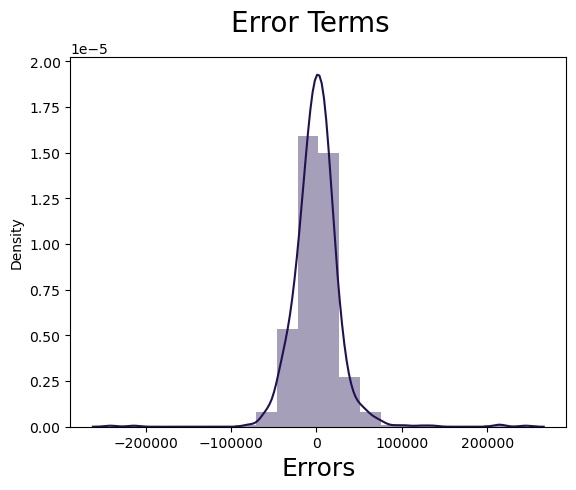

In [663]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Calculate r2 score of Test model

In [645]:
#evalate model
r2 = r2_score(y_true = y_train,y_pred = y_pred)
round(r2,2)

0.87

In [646]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_train - y_pred))
print(rss)
mse = mean_squared_error(y_train, y_pred)
print(mse)
rmse = mse**0.5
print(rmse)

805612879339.248
789042976.825904
28089.908807717835


In [647]:
# Residual analysis
y_res = (y_train - y_pred)


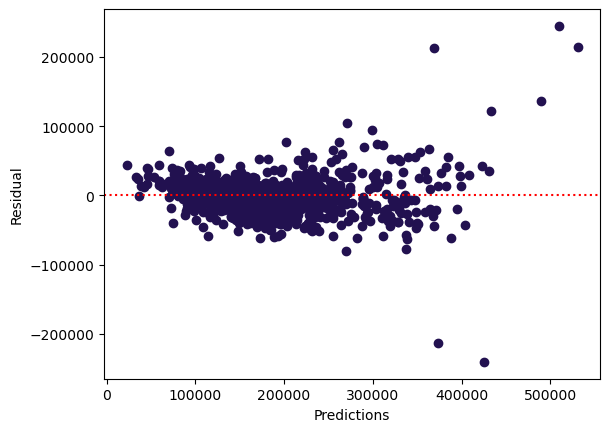

In [648]:
# data['res'] = y_res
plt.scatter( y_pred , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

### Prediction and Evalution on Test Data

In [649]:
#scale Test set
df_test[numeric_feats] = Scaler.transform(df_test[numeric_feats])
df_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtUnfSF,TotalBsmtSF,GrLivArea,BedroomAbvGr,...,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_NA,GarageQual_RFn,GarageQual_Unf
1436,0.00,0.386905,0.464334,0.250,0.625,0.000000,0.147137,0.408955,0.184446,0.625,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
57,0.32,0.732143,0.627687,0.625,0.375,0.000000,0.510234,0.406965,0.555068,0.625,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
780,0.00,0.422619,0.394855,0.625,0.375,0.091566,0.733907,0.594527,0.352871,0.625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
382,0.32,0.613095,0.479465,0.625,0.375,0.000000,0.557105,0.446269,0.588407,0.625,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1170,0.48,0.577381,0.518682,0.500,0.625,0.000000,0.340552,0.524378,0.294420,0.625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [650]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [651]:
#Running the Linear Model
test_lm = sm.OLS(y_test,X_test_new).fit()

In [652]:
#check summary()
test_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     75.85
Date:                Sun, 29 Oct 2023   Prob (F-statistic):          4.94e-156
Time:                        20:19:00   Log-Likelihood:                -5129.7
No. Observations:                 439   AIC:                         1.033e+04
Df Residuals:                     402   BIC:                         1.048e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.649e+04   1.44e+04      1.835      0.067   -1882.543    5.49e+04
MSSubClass           -1.365e+04   6371.613     -2.142      0.033   -2.62e+04   -1123.133
LotArea               3.235e+04   9094.504      3.557      0.000    1.45e+04    5.02e+04
OverallQual            1.35e+05   1.57e+04      8.592      0.000    1.04e+05    1.66e+05
OverallCond           3.571e+04   7818.595      4.567      0.000    2.03e+04    5.11e+04
BedroomAbvGr          1.361e+04   9146.951      1.488      0.138   -4370.098    3.16e+04
Fireplaces            1.411e+04   6944.982      2.032      0.043     459.330    2.78e+04
GarageCars            4.128e+04   1.06e+04      3.898      0.000    2.05e+04    6.21e+04
House_age            -2.736e+04   1.39e+04     -1.964      0.050   -5.48e+04      22.536
Remodel_age           -764.4191   6894.867     -0.111      0.912   -1.43e+04    1.28e+04
Total_sqr_footage     1.767e+05   2.13e+04      8.300      0.000    1.35e+05    2.19e+05
Total_Bathrooms       3777.1723   1.55e+04      0.243      0.808   -2.67e+04    3.43e+04
Total_porch_sf        1.111e+04   7660.609      1.450      0.148   -3954.704    2.62e+04
LotShape_IR3          2650.7637   3.08e+04      0.086      0.931   -5.78e+04    6.31e+04
LotConfig_FR2         -952.8717   7969.331     -0.120      0.905   -1.66e+04    1.47e+04
Neighborhood_Crawfor  1.247e+04   8409.130      1.483      0.139   -4060.902     2.9e+04
Neighborhood_Edwards -9336.1693   7118.202     -1.312      0.190   -2.33e+04    4657.380
Neighborhood_Mitchel -2.356e+04   9588.901     -2.457      0.014   -4.24e+04   -4712.952
Neighborhood_NAmes   -1.258e+04   5401.761     -2.330      0.020   -2.32e+04   -1965.544
Neighborhood_NWAmes  -1.635e+04   6854.748     -2.385      0.018   -2.98e+04   -2871.510
Neighborhood_NoRidge  3.019e+04    1.4e+04      2.158      0.032    2688.921    5.77e+04
Neighborhood_NridgHt  6.053e+04   9332.756      6.485      0.000    4.22e+04    7.89e+04
Neighborhood_OldTown -8634.9703   6966.935     -1.239      0.216   -2.23e+04    5061.206
Neighborhood_Sawyer  -7369.0772   7266.290     -1.014      0.311   -2.17e+04    6915.596
Neighborhood_Somerst  1.498e+04   7070.465      2.119      0.035    1083.658    2.89e+04
Neighborhood_StoneBr  7.676e+04   9947.175      7.717      0.000    5.72e+04    9.63e+04
Exterior1st_ImStucc   2.584e-12   6.08e-12      0.425      0.671   -9.37e-12    1.45e-11
Exterior2nd_BrkFace   9254.7921   1.06e+04      0.871      0.385   -1.16e+04    3.02e+04
Exterior2nd_ImStucc   2.652e+04   2.32e+04      1.144      0.253   -1.91e+04    7.21e+04
Exterior2nd_VinylSd   3688.2148   4034.858      0.914      0.361   -4243.843    1.16e+04
MasVnrType_BrkFace   -1.375e+04   6080.704     -2.262      0.024   -2.57e+04   -1799.641
MasVnrType_None      -8918.9510   6270.983     -1.422    

In [653]:
# Making predictions
y_pred = lm_4.predict(X_test_new)

In [654]:
# calculate r2 score of Test model
r2 = r2_score(y_true = y_test,y_pred = y_pred)
round(r2,2)

0.85

In [655]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_test - y_pred))
print(rss)
mse = mean_squared_error(y_test, y_pred)
print(mse)
rmse = mse**0.5
print(rmse)

431906002196.923
983840551.7014191
31366.232666697782


Text(0, 0.5, 'y_pred')

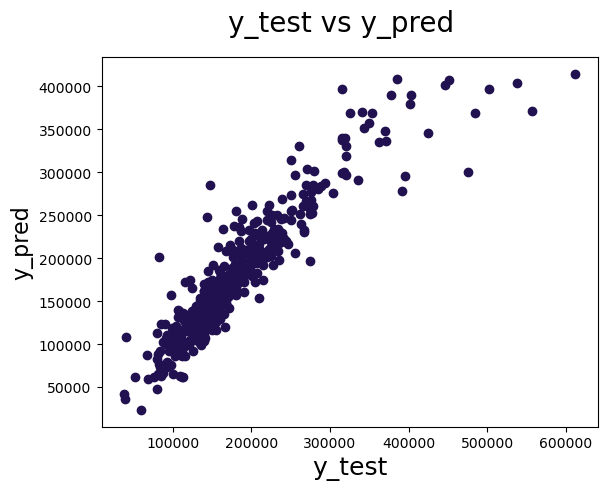

In [656]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [657]:
#drop the const
X_test_new = X_test_new.drop(['const'], axis=1)

## Final evalution

In [658]:
y_pred_train = lm_4.predict(X_train_lm_4)
# y_pred_test = test_lm.predict(X_test_new)
y_pred_test = y_pred

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8737651216488025
0.8471521535998715
805612879339.248
431906002196.923
789042976.825904
983840551.7014191


In [689]:
#Cross-validation, Model Building and Model Evaluation

def build_model(X_train, y_train, X_test, params, model='ridge'):
    if model == 'ridge':
        estimator_model = Ridge()
    else:
        estimator_model = Lasso()
    
    model_cv = GridSearchCV(estimator = estimator_model, 
                          param_grid = params, 
                          scoring= 'neg_mean_absolute_error', 
                          cv = 5, 
                          return_train_score=True,
                          verbose = 1)            
    model_cv.fit(X_train, y_train)
    
    
    alpha = model_cv.best_params_["alpha"]
    print("Optimum alpha for %s is %f" %(model, alpha))
    
    
    final_model = model_cv.best_estimator_
    print("Selected Type of model : ", final_model)
    final_model.fit(X_train, y_train)
    
    y_train_pred = final_model.predict(X_train)
    y_test_pred = final_model.predict(X_test)

    # Model Evaluation
    print(model.capitalize(),"Regression with alpha as",alpha)
    print("================= Model Evaluation ==================")
    print('R2 score (train) : ',r2_score(y_train,y_train_pred))
    print('R2 score (test) : ',r2_score(y_test,y_test_pred))
    
    print('RSS score (train) : ', np.sum(np.square(y_train - y_train_pred)))
    print('RSS score (test) : ', np.sum(np.square(y_test - y_test_pred)))
    
    print('RMSE (train) : ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
    print('RMSE (test) : ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

    return final_model, y_test_pred, y_train_pred

### Ridge Regression


In [691]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge_final_model, y_test_predicted, y_train_predicted = build_model(X_train_new, y_train, X_test_new, params, model='ridge')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Optimum alpha for ridge is 1.000000
Selected Type of model :  Ridge()
Ridge Regression with alpha as 1.0
================= Model Evaluation ==================
R2 score (train) :  0.8728615209157283
R2 score (test) :  0.846045536549764
RSS score (train) :  811379529553.9353
RSS score (test) :  435032997815.976
RMSE (train) :  28190.264599189497
RMSE (test) :  31479.573512926665


### Residual Analysis of the train data for Ridge Model

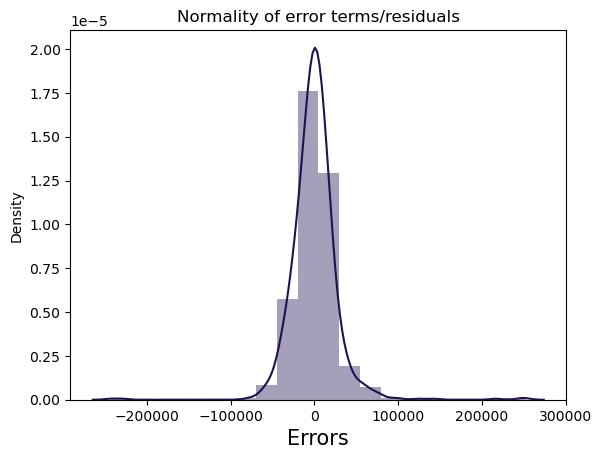

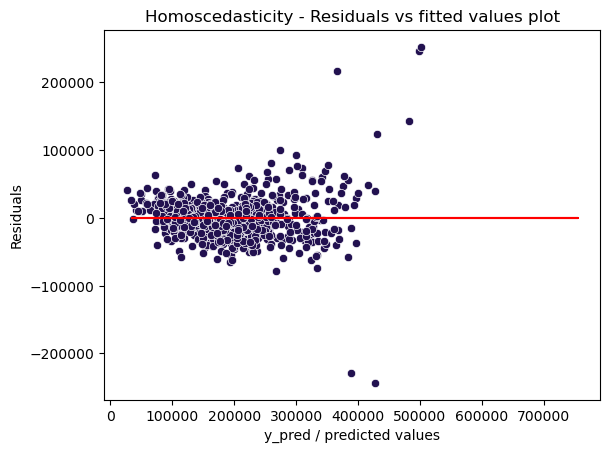

In [694]:
# Normality of Residuals
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_predicted), bins = 20)
plt.title('Normality of error terms/residuals')               # Plot heading 
plt.xlabel('Errors', fontsize = 15) 
plt.show()

residuals = y_train - y_train_predicted

sns.scatterplot(x=y_train_predicted,y=residuals)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('y_pred / predicted values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity - Residuals vs fitted values plot')
plt.show()

**Inference**

 - We can see error terms are normally distributed
 - The residuals are spread uniformly, which holds the assumption of homoscedasticity. Also no visible pattern were observed from above plot for residuals.

### Lasso Regression

In [693]:
params = {'alpha': [0.000001, 0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 500, 1000, 10000]}

lasso_final_model, y_test_predicted, y_train_predicted = build_model(X_train_new, y_train, X_test_new, params, model='lasso')


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Optimum alpha for lasso is 100.000000
Selected Type of model :  Lasso(alpha=100)
Lasso Regression with alpha as 100
================= Model Evaluation ==================
R2 score (train) :  0.8708876867068247
R2 score (test) :  0.8471117218136006
RSS score (train) :  823976256236.3127
RSS score (test) :  432020251311.8514
RMSE (train) :  28408.249761151797
RMSE (test) :  31370.38093894919


#### Residual Analysis of the train data for Lasso Model

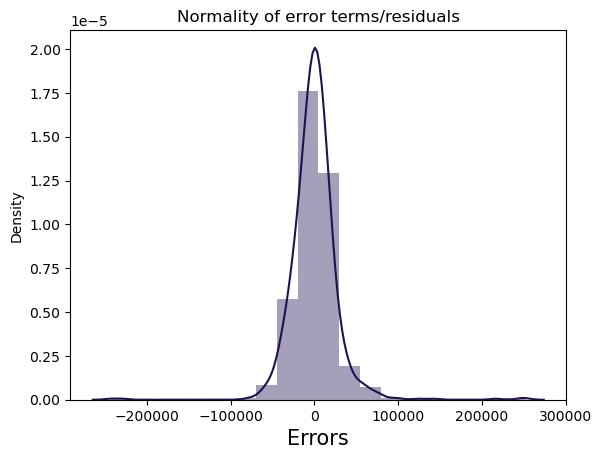

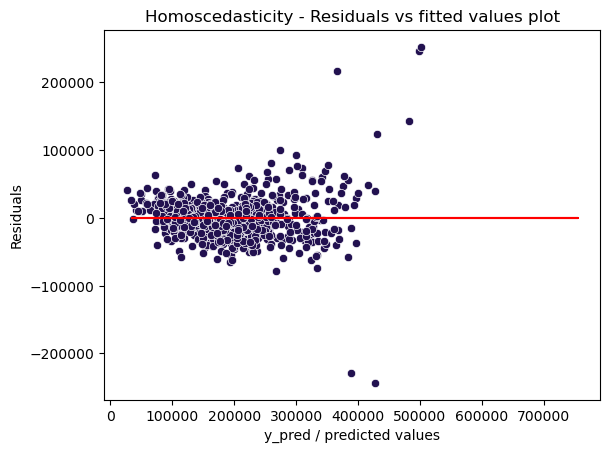

In [695]:
# Normality of Residuals
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_predicted), bins = 20)
plt.title('Normality of error terms/residuals')               # Plot heading 
plt.xlabel('Errors', fontsize = 15) 
plt.show()

residuals = y_train - y_train_predicted

sns.scatterplot(x=y_train_predicted,y=residuals)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('y_pred / predicted values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity - Residuals vs fitted values plot')
plt.show()

**Inference**

 - We can see error terms are normally distributed
 - The residuals are spread uniformly, which holds the assumption of homoscedasticity. Also no visible pattern were observed from above plot for residuals.

#### Comparing Model Coefficients



In [699]:
model_coefficients = pd.DataFrame(index=X_test_new.columns)
model_coefficients.rows = X_test_new.columns

model_coefficients['Ridge (alpha=1.0)'] = ridge_final_model.coef_
model_coefficients['Lasso (alpha=100)'] = lasso_final_model.coef_
pd.set_option('display.max_rows', None)
model_coefficients

,Ridge (alpha=1.0),Lasso (alpha=100)
MSSubClass,-21290.893214,-19506.513115
LotArea,39909.541661,37242.434736
OverallQual,112651.794207,122207.764046
OverallCond,21446.874088,17365.990864
BedroomAbvGr,9682.888955,4606.490315
Fireplaces,15627.403920,13644.163712
GarageCars,29098.446299,26688.191620
House_age,-29163.163437,-26420.782458
Remodel_age,-16697.162837,-16790.744128
Total_sqr_footage,155882.646282,175730.190922


Ridge & Lasso Regression produced similar results in regression. Choosing Lasso as the final model.


In [701]:
# 50 features ordered by feature importance in Lasso Regression

model_coefficients[['Lasso (alpha=100)']].sort_values(by='Lasso (alpha=100)', ascending=False)

,Lasso (alpha=100)
Total_sqr_footage,175730.190922
OverallQual,122207.764046
Neighborhood_NoRidge,53742.790643
LotArea,37242.434736
Neighborhood_NridgHt,37135.765238
Neighborhood_StoneBr,30508.013645
GarageCars,26688.191620
Exterior2nd_BrkFace,24603.251420
Neighborhood_Somerst,23316.353643
OverallCond,17365.990864


In [717]:
model_coefficients[['Lasso (alpha=100)']].sort_values(by='Lasso (alpha=100)', ascending=False).index[:10]


Index(['Total_sqr_footage', 'OverallQual', 'Neighborhood_NoRidge', 'LotArea',
       'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'GarageCars',
       'Exterior2nd_BrkFace', 'Neighborhood_Somerst', 'OverallCond'],
      dtype='object')

**Intrepretting the Model**

 - Ridge and Lasso Regression Model are built with optimum alpha calculated in GridSearchCV method.
 - Optimum alpha = `1.0` for Ridge and `100` for Lasso model


 - Lasso Regression is chosen as final model for having slightly better R-square value on test data.

 - Out of 40 features in the final model, top 10 features in order of descending importance are `'Total_sqr_footage', 'OverallQual', 'Neighborhood_NoRidge', 'LotArea',
       'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'GarageCars',
       'Exterior2nd_BrkFace', 'Neighborhood_Somerst', 'OverallCond'`

 -